# What is malaria?

> **Malaria spreads when a mosquito becomes infected with the disease after biting an infected person, and the infected mosquito then bites a noninfected person. The malaria parasites enter that person's bloodstream and travel to the liver. When the parasites mature, they leave the liver and infect red blood cells. **
> * Malaria is a life-threatening disease caused by a parasite? that is transmitted through the bite of infected female Anopheles mosquitoes.
* The parasite that causes malaria is a microscopic, single-celled organism called Plasmodium.
* Malaria is predominantly found in the tropical and sub-tropical areas of Africa, South America and Asia.
* There are six different species of malaria parasite that cause malaria in humans: Plasmodium falciparum, Plasmodium vivax, Plasmodium ovale curtisi, Plasmodium ovale wallikeri, Plasmodium malariae and the very rare Plasmodium knowlesi.


![](http://i.imgur.com/LmNjmjQ.jpg)

1. Healthy red blood cell; 2. Malaria parasites developing within infected red blood cells; 3. Malaria parasites about to burst out of red blood cell.



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

from torch import nn, optim
from torchvision import transforms, models, datasets

from fastai.callbacks import *
from sklearn.metrics import roc_curve, auc
from fastai.vision import *

sns.set(style='whitegrid')
plt.style.use('seaborn-darkgrid')
import os
print(os.listdir("../input/cell_images/cell_images/"))



['Parasitized', 'Uninfected']


# How malaria transmitted?

* Malaria is transmitted via the bite of the female Anopheles mosquito.
* These mosquitos most commonly bite between dusk and dawn.
* If a mosquito bites a person already infected with the malaria parasite it can suck up the parasite in the blood and then spread the parasite on to the next person they bite.


![](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/08/26/10/13/ds00475_im00175_mcdc7_malaria_transmitthu_jpg.jpg)

In [2]:
path = Path('../input/cell_images/cell_images/')
np.random.seed(42)

data = ImageDataBunch.from_folder(path, train='train', valid_pct=0.2, ds_tfms=get_transforms(),size=224, bs=128, num_workers=0).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (22047 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Parasitized,Parasitized,Parasitized,Parasitized,Parasitized
Path: ../input/cell_images/cell_images;

Valid: LabelList (5511 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Parasitized,Parasitized,Uninfected,Uninfected,Uninfected
Path: ../input/cell_images/cell_images;

Test: None

In [3]:
data.classes

['Parasitized', 'Uninfected']

![](https://static1.squarespace.com/static/5b1399b63e2d09fc93010364/t/5c12f9e9575d1fee96a4f3f3/1544747519916/MalariaCells.jpg?format=750w)

# Visualizing the Image

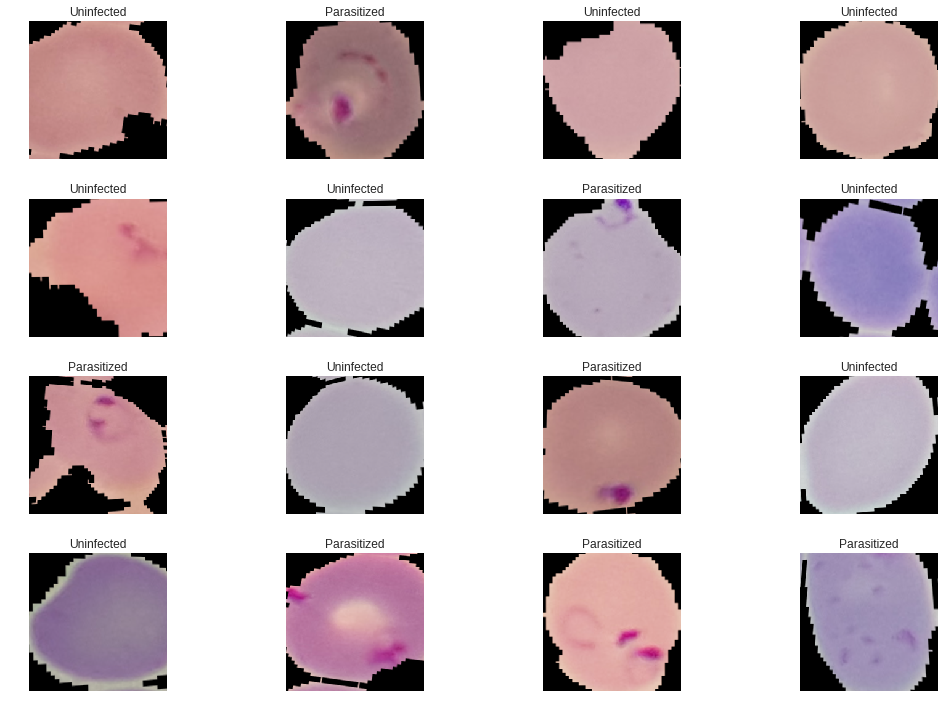

In [4]:
data.show_batch(4, figsize=(15,10))

# Transfer Learning Using Resnet50

In [5]:
learn = create_cnn(data, models.resnet50 , model_dir="/tmp/model/", metrics=[accuracy, error_rate])
learn

/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
102502400it [00:00, 118184524.39it/s]


Learner(data=ImageDataBunch;

Train: LabelList (22047 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Parasitized,Parasitized,Parasitized,Parasitized,Parasitized
Path: ../input/cell_images/cell_images;

Valid: LabelList (5511 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Parasitized,Parasitized,Uninfected,Uninfected,Uninfected
Path: ../input/cell_images/cell_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False

# Training the model

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.157020,0.134144,0.950644,0.049356,06:14
1,0.135350,0.109760,0.962802,0.037198,05:12
2,0.127325,0.089934,0.968427,0.031573,05:10
3,0.115550,0.086230,0.970060,0.029940,05:11
4,0.085312,0.073514,0.973508,0.026492,05:11
5,0.077365,0.070481,0.973870,0.026130,05:13


Better model found at epoch 0 with accuracy value: 0.9506441950798035.
Better model found at epoch 1 with accuracy value: 0.9628016948699951.
Better model found at epoch 2 with accuracy value: 0.9684267640113831.
Better model found at epoch 3 with accuracy value: 0.970059871673584.
Better model found at epoch 4 with accuracy value: 0.9735075235366821.
Better model found at epoch 5 with accuracy value: 0.9738704562187195.


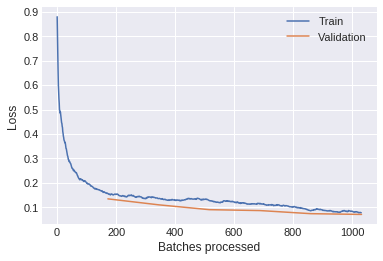

In [6]:
learn.fit_one_cycle(6, 1e-2, pct_start=0.05,callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy')])
learn.recorder.plot_losses()
plt.show()

# Fine Tuning

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
1.3182567385564074e-06


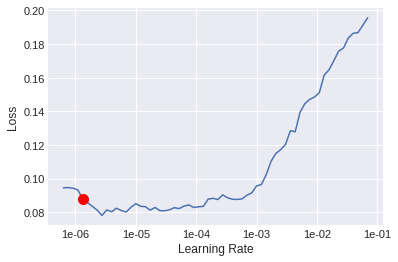

In [7]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)
Learning_rate = learn.recorder.min_grad_lr
print(Learning_rate)
plt.show()

In [8]:
learn.fit_one_cycle(3, Learning_rate, callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.079641,0.070217,0.973689,0.026311,05:34
1,0.083047,0.073046,0.973689,0.026311,13:25
2,0.081902,0.070472,0.973870,0.026130,13:57


Better model found at epoch 0 with accuracy value: 0.9736889600753784.
Better model found at epoch 2 with accuracy value: 0.9738704562187195.


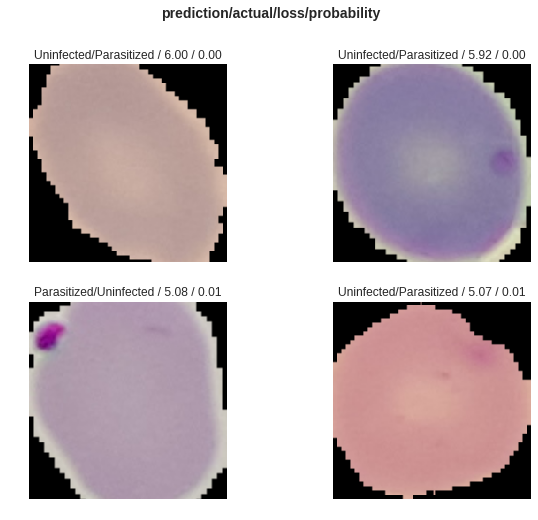

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(10,8), heatmap=False)
plt.show()

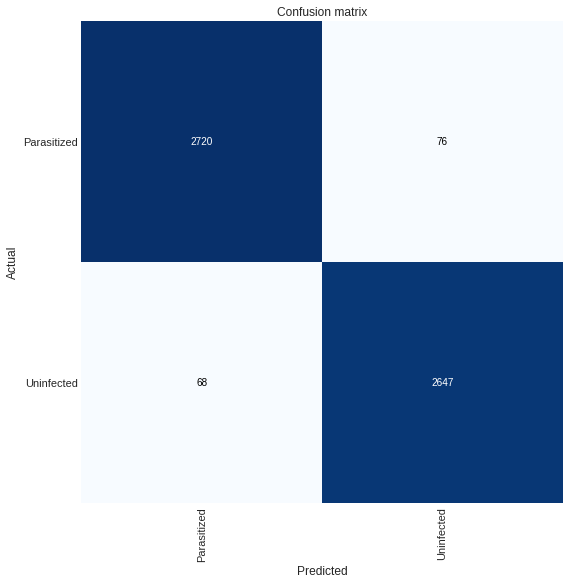

[('Parasitized', 'Uninfected', 76), ('Uninfected', 'Parasitized', 68)]

In [10]:
interp.plot_confusion_matrix(figsize=(10, 8))
plt.show()
interp.most_confused()

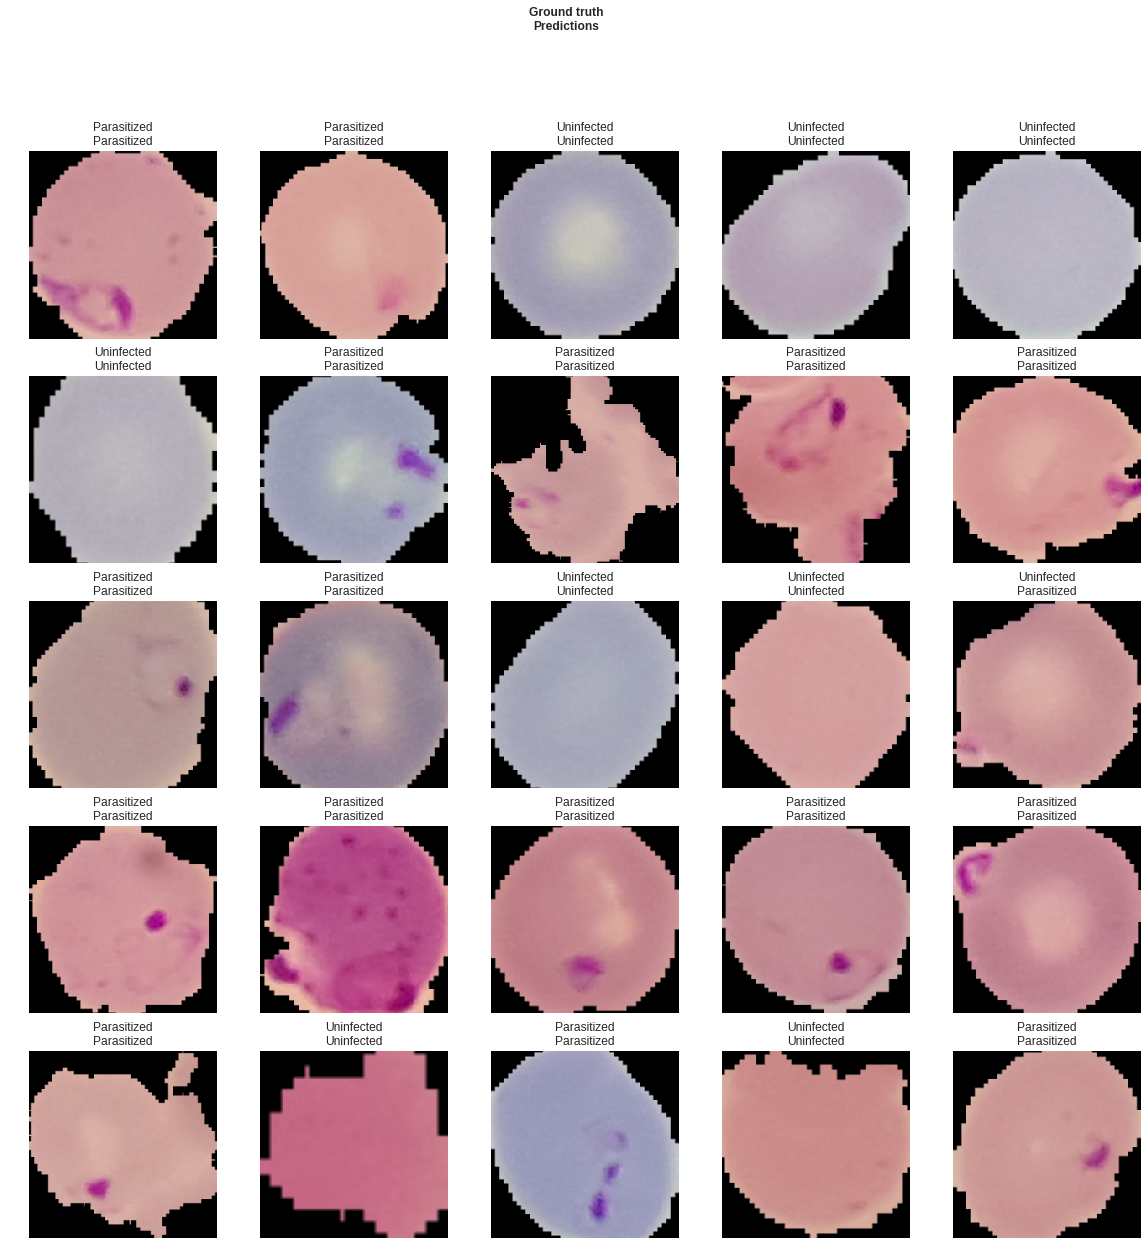

In [11]:
learn.show_results(ds_type=DatasetType.Valid)

# Reference
https://www.yourgenome.org/facts/what-is-malaria

https://www.nature.com/scitable/nated/topicpage/how-the-malaria-parasite-remodels-and-takes-132627374

https://www.cdc.gov/malaria/about/biology/index.html

https://www.mayoclinic.org/diseases-conditions/malaria/multimedia/malaria-transmission-cycle/img-20006373
